# Prey-Predator simulation in cadCad

Author: Danilo Lessa Bernardineli (danilo.lessa@gmail.com)

This is an cadCAD  simulation of the Lotka-Volterra prey-predator model 

## Dependences

In [0]:
%%capture
!pip install cadcad

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cadCAD.configuration import Configuration
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor

In [23]:
np.random.random()

0.4173923490819921

## Definitions

### Initial conditions and parameters

In [0]:
initial_conditions = {
    'prey_population': 100,
    'predator_population': 15,
    'dt': 0.1, # Precision of the simulation. Lower is more accurate / slower
    'prey_death_const': 0.03,
    'prey_birth_rate': 1.0,
    'predator_death_const': 1.0,
    'predator_birth_rate': 0.01
    }

_params = {
    "prey_birth_rate": [0.9, 1.0, 1.1],
    "prey_death_const": [0.02, 0.03, 0.04]
}

simulation_parameters = {
    'T': range(200),
    'N': 7,
    'M': {}
}

### Policies

In [0]:
def predator_births(params, step, sL, s):
  dt = s['dt']
  predator_population = s['predator_population']
  prey_population = s['prey_population']
  birth_fraction = s['predator_birth_rate'] + np.random.random() * 0.0002
  births =  birth_fraction * prey_population * predator_population * dt
  return {'add_to_predator_population': births}


def prey_births(params, step, sL, s):
  dt = s['dt']
  population = s['prey_population']
  birth_fraction = s['prey_birth_rate'] + np.random.random() * 0.1
  births =  birth_fraction * population * dt
  return {'add_to_prey_population': births}


def predator_deaths(params, step, sL, s):
  dt = s['dt']
  population = s['predator_population']
  death_rate = s['predator_death_const'] + np.random.random() * 0.005
  deaths = death_rate * population * dt
  return {'add_to_predator_population': -1.0 * deaths}


def prey_deaths(params, step, sL, s):
  dt = s['dt']
  death_rate = s['prey_death_const'] + np.random.random() * 0.1
  prey_population = s['prey_population']
  predator_population = s['predator_population']
  deaths = death_rate * prey_population * predator_population * dt
  return {'add_to_prey_population': -1.0 * deaths}

### State update functions

In [0]:
def update_prey(params, step, sL, s, _input):
    y = 'prey_population'
    x = s['prey_population'] + _input['add_to_prey_population']
    return (y, x)


def update_predator(params, step, sL, s, _input):
    y = 'predator_population'
    x = s['predator_population'] + _input['add_to_predator_population']
    return (y, x)

### State update blocks

In [0]:
partial_state_update_blocks = [
    { 
        'policies': {
            'predator_births': predator_births,
            'prey_births': prey_births,
            'predator_deaths': predator_deaths,
            'prey_deaths': prey_deaths,
        },
        'variables': {
            'predator_population': update_predator,
            'prey_population': update_prey
        }
    }
]

### Configuration and Execution

In [30]:

config = Configuration(initial_state=initial_conditions, 
                       partial_state_update_blocks=partial_state_update_blocks, 
                       sim_config=simulation_parameters 
                      )

exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.single_proc)
executor = Executor(exec_context, [config]) 
raw_result, tensor = executor.execute() 


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x7f099352c5c0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x7f099352c5c0>]


In [0]:
params = None

### Results

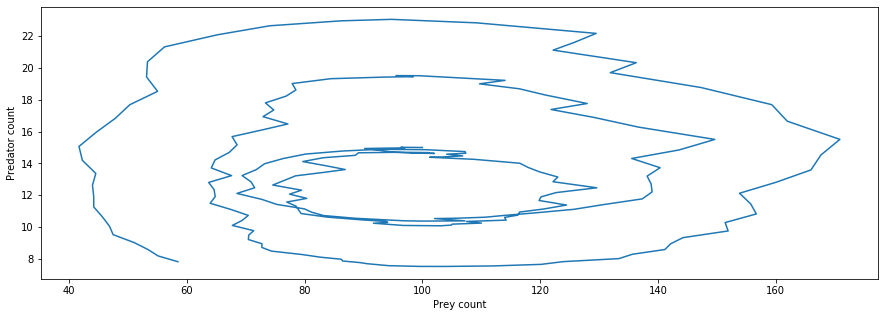

In [41]:
%matplotlib inline
plt.figure(figsize=(15, 5))
df = pd.DataFrame([result for result in raw_result if result['run'] == 1])
plt.plot(df.prey_population, df.predator_population)

#df = pd.DataFrame([result for result in raw_result if result['run'] == 2])
#plt.plot(df.prey_population, df.predator_population)

#df = pd.DataFrame([result for result in raw_result if result['run'] == 3])
#plt.plot(df.prey_population, df.predator_population)


plt.xlabel("Prey count")
plt.ylabel("Predator count")
plt.show()

In [51]:
raw_result[2]

{'dt': 0.1,
 'predator_birth_rate': 0.01,
 'predator_death_const': 1.0,
 'predator_population': 15.087972131207714,
 'prey_birth_rate': 1.0702649015068566,
 'prey_death_const': 0.032252268452584644,
 'prey_population': 112.07357731077184,
 'run': 1,
 'substep': 1,
 'timestep': 2}